In [27]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [28]:
list_path=os.listdir(r"bbk")
list_path=["bbk/"+i for i in list_path]
list_path

['bbk/16273.jpg',
 'bbk/16274.jpg',
 'bbk/LINE_ALBUM_slip_230227_106.jpg',
 'bbk/LINE_ALBUM_slip_230227_163.jpg',
 'bbk/LINE_ALBUM_slip_230227_169.jpg',
 'bbk/LINE_ALBUM_slip_230227_170.jpg',
 'bbk/LINE_ALBUM_slip_230227_171.jpg',
 'bbk/LINE_ALBUM_slip_230227_172.jpg',
 'bbk/LINE_ALBUM_slip_230227_178.jpg',
 'bbk/LINE_ALBUM_slip_230227_179.jpg',
 'bbk/LINE_ALBUM_slip_230227_17_0.jpg',
 'bbk/LINE_ALBUM_slip_230227_185.jpg',
 'bbk/LINE_ALBUM_slip_230227_193.jpg',
 'bbk/LINE_ALBUM_slip_230227_195.jpg',
 'bbk/LINE_ALBUM_slip_230227_196.jpg',
 'bbk/LINE_ALBUM_slip_230227_197.jpg',
 'bbk/LINE_ALBUM_slip_230227_198.jpg',
 'bbk/LINE_ALBUM_slip_230227_201.jpg',
 'bbk/LINE_ALBUM_slip_230227_202.jpg',
 'bbk/LINE_ALBUM_slip_230227_204.jpg',
 'bbk/LINE_ALBUM_slip_230227_205.jpg',
 'bbk/LINE_ALBUM_slip_230227_207.jpg',
 'bbk/LINE_ALBUM_slip_230227_208.jpg',
 'bbk/LINE_ALBUM_slip_230227_210.jpg',
 'bbk/LINE_ALBUM_slip_230227_212.jpg',
 'bbk/LINE_ALBUM_slip_230227_213.jpg',
 'bbk/LINE_ALBUM_slip_23022

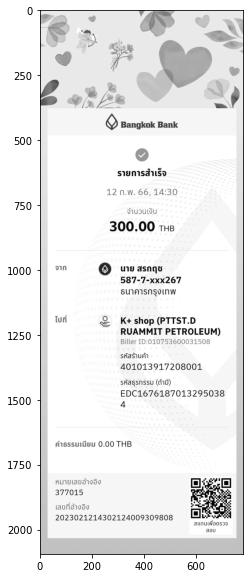

In [29]:
img=cv2.imread(list_path[0],0)
#_,img=cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(img,"gray")

In [30]:
reader=easyocr.Reader(['th','en'])

ls = reader.readtext(img,detail=0,paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[' bangkok bank',
 'รายการสำเร็จ',
 '12 ก.พ. 66, 14:30',
 'จำนวนเงิน',
 '300.00 thb',
 ' จาก',
 'นาย สรกฤช',
 '587-7-xxx267',
 'ธนาคารกรุงเทพ',
 ' ไปที่',
 'k+ shop (pttst.d',
 'ruammit petroleum)',
 'biller 1d:010753600031508',
 'รหัสร้านค้า',
 '401013917208001',
 ' รหัสธรกรรม (ถ้ามี)',
 'edc1676187013295038',
 '4',
 'ค่าธรรมเนียม o.0d thb',
 'หมายเลข อ้างอิง',
 '377015',
 ' เลขที่อ้างอิง',
 '2023021214302124009309808',
 'สแกนเพื่อตรวจ',
 'สอบ']

In [ ]:
#Test the bank slip logical
list_path=os.listdir(r"bbk")
list_path=["bbk/"+i for i in list_path]
list_path

check_list = []
img_list = []
reader=easyocr.Reader(['th','en'])
for i in tqdm(range(0,10)):
    img = cv2.imread(list_path[i],0)
    ls = reader.readtext(img,detail=0,paragraph=False)
    if 'angko' in ls[0] and (sum(1 for w in ls if 'รุงเท' in w) >= 1 or sum(1 for w in ls if 'angko' in w) >= 2) :
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)


In [32]:
(sum(1 for w in ls if 'รุงเท' in w) >= 1 or sum(1 for w in ls if 'angko' in w) >= 2)

True

In [36]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['th','en'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k], 0)
        if img is not None:  # check if image was loaded correctly
            ls = reader.readtext(img, detail=0, paragraph=False)

            if 'angko' in ls[0] and (sum(1 for w in ls if 'รุงเท' in w) >= 1 or sum(1 for w in ls if 'angko' in w) >= 2) : #Logical for Bank slip
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")

    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [01:54<00:00, 16.41s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:18<00:00, 19.77s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['1', '1', '1', '1', '1', '1', '1']


100%|██████████| 7/7 [02:08<00:00, 18.32s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [03:40<00:00, 31.55s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:52<00:00, 16.09s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [04:56<00:00, 42.41s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [02:21<00:00, 20.19s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [06:16<00:00, 53.85s/it]

check_list_ttb ['0', '0', '0', '0', '0', '0', '0']
